# PISA Data Exploration



## 1 : Preliminary Wrangling
This document explore a survey of students' skills and knowledge as they approach the end of compulsory education..




In [2]:
#load all the neccessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(style='ggplot')

In [3]:
#Loading The DataSet

df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [4]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
print(df.shape)
print(df.dtypes)
print(df.head(10))

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:2

                 index     0     Perc.
3     start_station_id   197  0.107408
4   start_station_name   197  0.107408
7       end_station_id   197  0.107408
8     end_station_name   197  0.107408
13   member_birth_year  8265  4.506248
14       member_gender  8265  4.506248


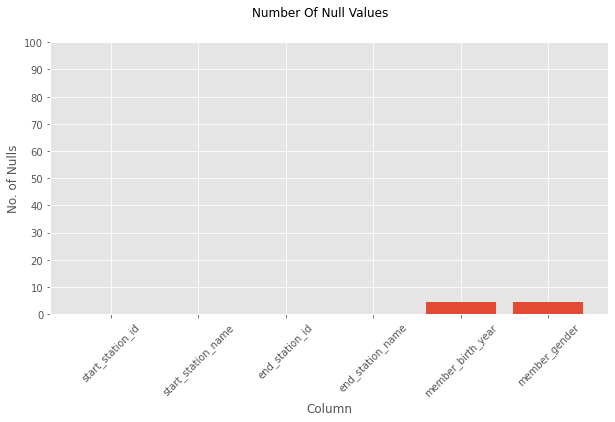

In [14]:
#creating a data with the null values count
nullcount = df.isna().sum()
nullcount = pd.DataFrame(nullcount).reset_index()
#droping columns with no null values
nullcount['Perc.'] = (nullcount[0]/len(df))* 100
nullcount = nullcount[nullcount[0] != 0]

#visulization for the nnull counts 
fig = plt.figure(figsize=(10, 5))
ax = plt.bar(nullcount['index'],nullcount['Perc.'])
ticks = plt.xticks(rotation = 45)
yticks = plt.yticks(range(0,110,10))
title = fig.suptitle("Number Of Null Values")
plt.ylabel('No. of Nulls')
plt.xlabel('Column')

print(nullcount)

## 2 : Exploatory Data Analysis